## ▣ MZ세대의 소비 분석 파트
___

#### 1. 분석 방향
---
 * 1-1. 코로나 전과 후로 달라진 MZ세대들의 소비 패턴 파악하기             
 * 1-2. MZ세대들의 소비 패턴이 달라진 인과관계를 BC 데이터에서 파악하기  
 * 1-3. M세대와 Z세대의 소비 패턴을 분석하기

#### 2. 데이터 전처리
---
 * 2-1. 데이터 로드
 * 2-2. 데이터 전처리
 * 2-3. 파생변수 생성
 * 2-4. EDA
 
#### 3. 데이터 분석
---
 * 3-1. Data Scaling
 * 3-2. Decision Tree Modeling
 * 3-3. Graphviz를 활용한 시각화
 * 3-4. 군집별 데이터 분석(EDA)
 
#### 4. 분석 결과 활용 방안
---
 * 4-1. 분석결과 요약
 * 4-2. 맞춤형 체크/신용카드 혜택 및 이벤트 설계


## 1. 분석 방향
---

### *은행들은 왜 MZ세대에 열광할까*

MZ세대는 과거와 달리 자산운용은 물론 금융회사가 제공하는 서비스 활용에 적극적입니다. 또한 금융 장벽이 빠르게 허물어지고 빅테크기업들과의 경쟁이 시작되었기 때문에 이 경쟁을 이끄는 주체인 MZ세대를 제대로 분석하고 공략해야합니다. 따라서, 저희팀은 팀원 모두가 MZ세대로서 MZ세대의 관점에서 꼭 필요한 금융상품을 알아내기 위해 데이터 분석을 해보았습니다.


MZ세대의 **소비 분석파트**에서의 분석 방향은 다음과 같습니다.

 + 1-1. 코로나 전과 후로 달라진 MZ세대들의 소비 패턴을 분석해보겠습니다.
 + 1-2. MZ 세대들의 소비 패턴이 달라진 인과 관계를 데이터에서 파악해보겠습니다.
 + 1-3. M세대와 Z세대의 소비 패턴을 분석해보겠습니다.

##  2. 데이터 전처리

### 필요한 패키지 및 라이브러리 import

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
%matplotlib inline
import pyecharts
from pyecharts import *
from datetime import datetime
from IPython.display import Image
from pyecharts import Line
from pyecharts import Bar
from pyecharts import online
online()
warnings.filterwarnings('ignore')
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'C:/Windows/Fonts/malgun.ttf').get_name()
mpl.rc('font', family = font_name)

plt.style.use('seaborn') # seaborn 스타일로 변환
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
pd.set_option('display.max_columns',None)
warnings.filterwarnings(action='ignore') # Warning Message 안 보이게
import pandas.util.testing as tm

import matplotlib as mpl # 고해상도 Plot 을 위해 DPI 조절
mpl.rcParams['figure.dpi']=150

### 2-1.  활용 데이터 로드

In [2]:
bc = pd.read_csv('C:\\Users\\sjjung\\Desktop\\contestData\\bccard.csv')
bc

,기준년월,품목대분류코드,품목대분류명,품목중분류코드,품목중분류명,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,고객소재지_읍면동,매출금액,매출건수
0,201903,10,의류,1010,여성의류,여성,40대,초중고자녀가구,서울특별시,구로구,궁동,782521,13
1,201903,21,e상품/서비스,2110,o2o서비스,여성,20대,신혼영유아가구,서울특별시,구로구,궁동,963789,29
2,201903,19,출산/육아,1913,육아용품서비스,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,924309,46
3,201903,21,e상품/서비스,2111,e머니/상품권,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1089360,54
4,201903,17,생활,1710,생활용품,여성,30대,신혼영유아가구,서울특별시,구로구,궁동,1656740,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519292,202103,20,여가/스포츠,2013,여행,여성,30대,1인가구,서울특별시,영등포구,영등포동7가,1411368,7
519293,202103,21,e상품/서비스,2110,o2o서비스,남성,30대,1인가구,서울특별시,영등포구,영등포동7가,1386040,63
519294,202103,11,패션잡화,1113,시계/주얼리,여성,30대,신혼영유아가구,서울특별시,영등포구,영등포동7가,390818,7
519295,202103,16,식품,1610,가공식품,남성,40대,초중고자녀가구,서울특별시,영등포구,영등포동7가,327592,7


### 데이터검증

In [3]:
bc.info() # 컬럼별 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   기준년월        519297 non-null  int64 
 1   품목대분류코드     519297 non-null  int64 
 2   품목대분류명      519297 non-null  object
 3   품목중분류코드     519297 non-null  int64 
 4   품목중분류명      519297 non-null  object
 5   성별          519297 non-null  object
 6   연령          519297 non-null  object
 7   가구생애주기      519297 non-null  object
 8   고객소재지_광역시도  519297 non-null  object
 9   고객소재지_시군구   519297 non-null  object
 10  고객소재지_읍면동   519297 non-null  object
 11  매출금액        519297 non-null  int64 
 12  매출건수        519297 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 51.5+ MB


In [4]:
bc.describe() 

,기준년월,품목대분류코드,품목중분류코드,매출금액,매출건수
count,519297.000000,519297.000000,519297.000000,5.192970e+05,519297.000000
mean,201995.665719,18.282054,1839.539046,2.188457e+06,48.958860
std,74.914933,13.237654,1323.699108,6.438257e+06,163.855617
min,201903.000000,10.000000,1010.000000,1.490000e+03,4.000000
25%,201909.000000,13.000000,1312.000000,3.412650e+05,9.000000
50%,202003.000000,17.000000,1710.000000,7.628000e+05,17.000000
75%,202009.000000,20.000000,2013.000000,1.878443e+06,38.000000
max,202103.000000,99.000000,9913.000000,5.918488e+08,11811.000000


In [5]:
bc.isnull().sum() # 결측치 확인

기준년월          0
품목대분류코드       0
품목대분류명        0
품목중분류코드       0
품목중분류명        0
성별            0
연령            0
가구생애주기        0
고객소재지_광역시도    0
고객소재지_시군구     0
고객소재지_읍면동     0
매출금액          0
매출건수          0
dtype: int64

In [6]:
bc[bc.columns[bc.dtypes.map(lambda x: x=='object')]].describe().transpose() # 명목형 데이터 특이점 확인

,count,unique,top,freq
품목대분류명,519297,13,e상품/서비스,76052
품목중분류명,519297,50,o2o서비스,42064
성별,519297,2,여성,330244
연령,519297,6,40대,159877
가구생애주기,519297,5,신혼영유아가구,178693
고객소재지_광역시도,519297,3,서울특별시,306122
고객소재지_시군구,519297,38,수원시,38891
고객소재지_읍면동,519297,685,논현동,4251


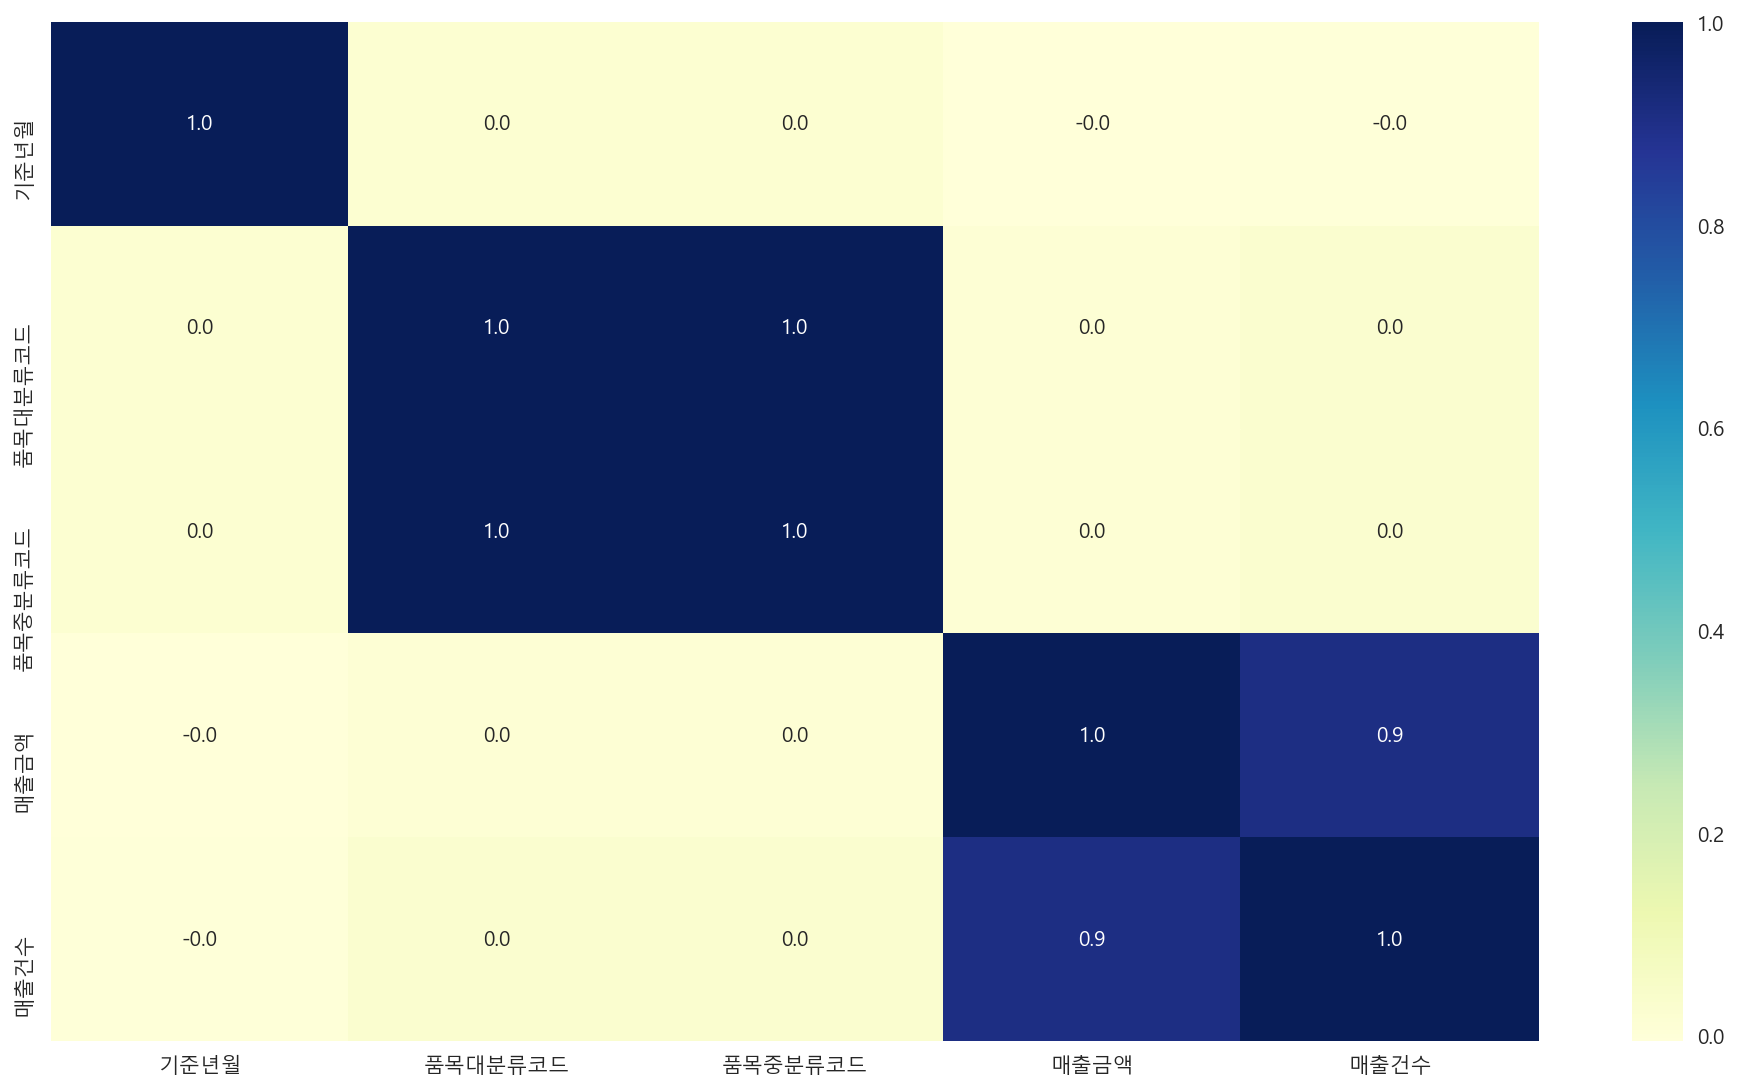

In [7]:
plt.figure(figsize=(16,9))
sns.heatmap(bc.corr(),cmap='YlGnBu',annot=True,fmt="0.1f")
plt.show()
# 품목중분류코드,품목대분류코드 | 매출금액,매출건수 간의 다중공선성 우려

### 2-2. 데이터 전처리

In [8]:
bc.drop(['고객소재지_광역시도','고객소재지_시군구','고객소재지_읍면동'],axis=1,inplace=True)

=> 데이터를 고객소재지별로 분류하거나 고객소재지를 통해 특이점을 도출할 것이 아니기 때문에 고객소재지관련 컬럼은 제거해줬습니다.

### 2-3. 파생변수 생성

In [9]:
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

=> 기존 연령 컬럼의 경우 object 타입으로 int 형으로 형변환 해주었습니다.

In [10]:
# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)

=> 성별 컬럼의 경우도 object 타입이기 때문에 int 형으로 형변환 해주었습니다.

In [11]:
pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

=> 건당 매출금액을 알기 위해 매출 평균이라는 파생변수를 생성해주었습니다.

In [12]:
# mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

=> 머신러닝 모델링을 위해 반응변수가 필요하기 때문에 mz세대 여부에 따라 1과 0으로 분리해줬습니다.

### 2-4. EDA

## 3. 데이터 분석

**Decision Tree** 모델을 활용하여 MZ세대를 반응변수로 두고 Feature Importances를 확인해보겠습니다.     
이를 통해, MZ세대를 구분지을 수 있는 가장 큰 특징이 무엇인지 분석해보도록 하겠습니다

### 3-1. Data Scaling

In [13]:
bc.drop(['연령'],axis=1,inplace=True)
bc.drop(['품목대분류명','품목중분류명'],axis=1,inplace=True)

# 명목형 변수 더미화 (가구생애주기 컬럼만을 더미화)
x = pd.get_dummies(bc.iloc[ : , 0:-1 ])
y = bc.iloc[ : , -1 ]

# 훈련 데이터와 테스트 데이터를 분리 합니다. + 정규화 
from  sklearn.preprocessing  import MinMaxScaler

x_scaled = MinMaxScaler().fit(x).transform(x)

from  sklearn.model_selection  import   train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)
print(x_train.shape)  # (415437, 12)
print(x_test.shape)  # (103860, 12)
print(y_train.shape)  # (415437,)
print(y_test.shape) # (103860,)

(415437, 12)
(103860, 12)
(415437,)
(103860,)


+ 1. 반응변수(MZ세대)와의 다중공선성 문제로 인해 연령 컬럼을 삭제해두었습니다.
+ 2. 품목명의 경우 대분류 : 13개 , 중분류 : 50개가 있기 때문에 대분류코드, 중분류코드 컬럼을 남겨두고 명목형변수 컬럼인 대분류명과 중분류명을 삭제해두었습니다.   
+ 3. 명목형 변수인 가구생애주기를 더미화해주어 수치형 변수로 바꾸어주었습니다.
+ 4. 훈련데이터와 테스트 데이터를 분리해주었습니다.
+ 5. MinMaxScaler 를 활용하여 수치형 변수를 정규화해주었습니다.

### 3-2. Decision Tree Modeling

In [14]:
from  sklearn.tree  import  DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# 모델 훈련
model.fit(x_train, y_train)

# 모델 예측
result = model.predict(x_test)

# 10.   모델 평가
print(model.score(x_train,y_train)) # 훈련데이터 스코어 0.9004710702224404
print(model.score(x_test,y_test))  # 테스트 데이터 스코어 0.8997785480454458
print(model.feature_importances_)

0.9004710702224404
0.8997785480454458
[0.         0.         0.         0.         0.         0.00846695
 0.         0.42552983 0.         0.         0.54770897 0.01829426]


+ Decision Tree Modeling 의 경우 criterion 에서 **엔트로피** 지수를 활용했습니다.    
+ Test Data의 컬럼이 12개이고 MZ 세대의 특징을 결정짓는 가장 중요도가 높은 변수를 구하기 때문에 Max Depth의 경우 3을 주었습니다.
+ 위의 결과, 훈련 데이터의 분류 정확도는 약 90.047%이며, 테스트 데이터의 분류 정확도는 약 89.977% 입니다.
+ 변수 중요도의 경우 [가구생애주기 - 신혼영유아가구] - [가구생애주기 - 1인가구] - [가구생애주기 - 초중고자녀가구] 순으로 중요도를 보입니다.

### 3-3. Graphviz 를 활용한 시각화

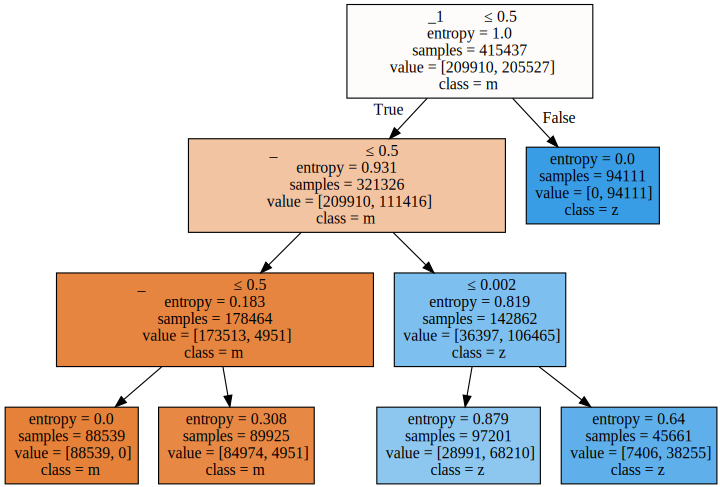

In [15]:
# 11. graphviz 로 의사결정트리 그리기
import graphviz
from sklearn.tree import export_graphviz

export_graphviz(model, out_file="tree.dot", class_names='mz세대',
                feature_names = x.columns, impurity=True, filled=True,special_characters = True)

with open("tree.dot",encoding='utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

import pydotplus
pydot_graph = pydotplus.graph_from_dot_data(dot_graph)
pydot_graph.set_size('"10,9!"')
pydot_graph.write_png('resized_tree.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

Graphviz 를 활용해 시각화한 결과, MZ세대를 구분지을 수 있는 가장 큰 요소는 가구생애주기(가구유형)의 **1인가구** 유형 유무이었습니다.
위의 결과가 맞는지 **EDA 기법**을 활용하여 분석해보도록 하겠습니다. 

### 3-4. 군집별 데이터 분석(EDA)

In [16]:
# MZ 아닌 다른세대 데이터프레임 구성
bc_ad = bc[bc['mz세대']==0]

# 2019년도 기성세대 데이터프레임 구성
ad2019 = bc_ad[(bc_ad['기준년월']==201903) | (bc_ad['기준년월']==201909)]
ad2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 기성세대 데이터프레임 구성
ad2021 = bc_ad[(bc_ad['기준년월']==202003) | (bc_ad['기준년월']==202009) | (bc_ad['기준년월']==202103)]
ad2021.drop(['기준년월'],axis=1,inplace=True)

In [17]:
ad2019['인원'] = 1
temp = ad2019.groupby('가구생애주기')['인원'].sum()
ad2021['인원'] = 1
temp2 = ad2021.groupby('가구생애주기')['인원'].sum()

In [18]:
attr = list(bc_ad['가구생애주기'].unique())
v1 = list(temp)
v2 = list(temp2)

pie = Pie("MZ아닌세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v1, is_random=True,center=[25,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v2, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)


*MZ아닌세대의 경우 코로나 이후 노인가구의 비율이 **5.31% 감소**했으며, 신혼영유가구,초중고자녀가구,성인자녀가구의 비율이 각각  
**0.16%,3.54%,1.61% 증가**했다.*

In [19]:
# MZ세대 데이터프레임 구성
bc_mz = bc[bc['mz세대']==1]

# 2019년도 mz세대 데이터프레임 구성
mz2019 = bc_mz[(bc_mz['기준년월']==201903) | (bc_mz['기준년월']==201909)]
mz2019.drop(['기준년월'],axis=1,inplace=True)

# 2020년,2021년도 mz세대 데이터프레임 구성
mz2021 = bc_mz[(bc_mz['기준년월']==202003) | (bc_mz['기준년월']==202009) | (bc_mz['기준년월']==202103)]
mz2021.drop(['기준년월'],axis=1,inplace=True)

mz2019['인원'] = 1
temp3 = mz2019.groupby('가구생애주기')['mz세대'].sum()
mz2021['인원'] = 1
temp4 = mz2021.groupby('가구생애주기')['mz세대'].sum()

attr = ['1인가구','신혼영유아가구','초중고자녀가구']
v3 = list(temp3)
v4 = list(temp4)

pie = Pie("MZ세대 인원 분포도",width=1000,title_pos="center")
pie.add("2019년도", attr, v3, is_random=True,center=[20,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=True,)
pie.add("20,21년도", attr, v4, is_random=True,center=[75,50], radius=[20, 60],is_label_show=True, rosetype='area',is_legend_show=False,)



*반면에 MZ 세대의 경우 1인가구의 비중이 **42.3% 에서 47.73% 로 약 5.43% 증가**하였다. 반면에 **신혼영유가구의 비중은 55.82%에서 49.58% 로 5.24% 감소**하였다.    
이는 신혼영유아가구에서 초중고자녀가구로 일부 전환했음에도 불구하고 **MZ 세대의 1인가구 비중이 증가**했음을 의미한다.

MZ세대를 구분하는데 중요한 특징은 1인가구이었으며, 실제로 코로나 전과 후를 비교해보았을 때 1인가구의 비율이 증가했음을 알 수 있다.  
이제 **코로나 전과 후의 MZ세대의 소비패턴**을 분석해보도록 하겠습니다.   
    
+ M(만26세부터 42세), 단 데이터에서는 30대로 한정, 세대 분리해서 그룹핑
+ Z(만12세부터 만25세), 데이터에서는 10대,20대로 구분지어 그룹핑
+ 코로나 전과 후의 분기당 평균 매출 건수의 증가율에 따라 변동순위 부여

In [33]:
# 다시 새롭게 데이터로드하고 데이터 전처리 및 파생변수 생성하겠습니다.

bc = pd.read_csv('C:\\Users\\sjjung\\Desktop\\contestData\\bccard.csv')
# mz세대 -> 연령(1,2,3) -> 1, 나머지 0
bc['연령'].unique() # array(['40대', '20대', '30대', '50대', '60대 이상', '20세 미만'], dtype=object)

def age(x):
    if x == '20세 미만':
        return x.replace(x,'1')
    elif x == '20대':
        return x.replace(x,'2')
    elif x == '30대':
        return x.replace(x,'3')
    elif x == '40대':
        return x.replace(x,'4')
    elif x == '50대':
        return x.replace(x,'5')
    else:
        return x.replace(x,'6')

bc['연령'] = bc['연령'].apply(age)
bc['연령'] = bc['연령'].astype('int64')

bc['mz세대'] = bc['연령'].apply(lambda x:1 if x in (1,2,3) else 0)

pd.options.display.float_format = '{:,.0f}'.format
bc['매출평균'] = bc['매출금액']/bc['매출건수']

# 성별 컬럼 여 1, 남 0
bc['성별'] = bc['성별'].apply(lambda x:1 if x=='여성' else 0)


In [41]:
# z세대 여성 2019년 품목 상위 15개 매출 건수
bc_20 = bc[bc['mz세대']==1]
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
fm_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==1]
fm_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2019['분기당_평균_매출건수'] = (fm_bc_20_2019['매출건수'] / 2).astype('int64')
fm_bc_20_2019_total = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2019_avg = fm_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2019_consume = pd.merge(fm_bc_20_2019_total,fm_bc_20_2019_avg)

fm_bc_20_z_2019 = fm_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

#fm_bc_20_z_2019['매출순위'] = fm_bc_20_z_2019['분기당_평균_매출건수'].rank(method='min',ascending=False)

fm_bc_20_z_2019

,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균
1,e상품/서비스,o2o서비스,52080470813,1408735,703315,"37,584"
0,e상품/서비스,e머니/상품권,5540670074,207295,102966,"24,714"
20,생활,생활용품,6907948135,206667,102607,"33,939"
29,여가/스포츠,취미/특기,6930665557,169762,84223,"47,552"
28,여가/스포츠,여행,11334891092,127361,63023,"88,646"
23,식품,신선/요리재료,4521002795,117941,58387,"38,071"
42,출산/육아,육아용품서비스,3776220909,109106,54047,"36,815"
39,전자,디지털,5883850014,105854,52269,"57,683"
41,출산/육아,어린이용품서비스,4066659618,104551,51764,"40,580"
8,건강,건강식품,4598053987,98712,48766,"47,603"


In [42]:
# z세대 여성 2020,21년도 품목별 매출건수 상위 top 15
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
fm_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==1]
fm_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_20_2021['분기당_평균_매출건수'] = (fm_bc_20_2021['매출건수'] / 3).astype('int64')
fm_bc_20_2021_total = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_20_2021_avg = fm_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_20_2021_consume = pd.merge(fm_bc_20_2021_total,fm_bc_20_2021_avg)
fm_bc_20_z_2021 = fm_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

#fm_bc_20_z_2021['매출순위'] = fm_bc_20_z_2021['분기당_평균_매출건수'].rank(method='min',ascending=False)
fm_bc_20_z_2021



,품목대분류명,품목중분류명,매출금액,매출건수,분기당_평균_매출건수,매출평균
1,e상품/서비스,o2o서비스,101087073978,2942837,978471,"34,378"
0,e상품/서비스,e머니/상품권,10195817219,324973,106863,"29,459"
21,생활,생활용품,10199719083,312520,102646,"32,628"
30,여가/스포츠,취미/특기,11618688174,277604,91078,"45,334"
24,식품,신선/요리재료,9817091052,272091,89314,"35,010"
23,식품,가공식품,6181337655,209449,68446,"28,826"
8,건강,건강식품,9212647199,193041,63036,"46,156"
40,전자,디지털,11965483327,189148,61609,"62,456"
25,식품,음료,4178360455,167486,54592,"24,971"
43,출산/육아,육아용품서비스,5220004757,140850,45845,"38,960"


In [74]:
# z세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
fm_bc20_cov_mz = pd.merge(fm_bc_20_z_2019,fm_bc_20_z_2021,how='inner',on='품목중분류명') 
fm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)

fm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

fm_bc20_cov_mz['분기당_평균_매출건수後'] = fm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
fm_bc20_cov_mz['분기당_평균_매출건수前'] =fm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (fm_bc20_cov_mz['분기당_평균_매출건수後'] - fm_bc20_cov_mz['분기당_평균_매출건수前'])
fm_bc20_cov_mz['매출건수차이(%)'] = temp / fm_bc20_cov_mz['분기당_평균_매출건수前']

fm_bc20_cov_mz['변동순위'] = fm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
fm_bc20_cov_mz = fm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)
fm_bc20_cov_mz


,품목대분류,품목중분류,매출금액前,분기당_평균_매출건수前,매출평균前,매출금액後,분기당_평균_매출건수後,매출평균後,매출건수차이(%),변동순위
5,식품,신선/요리재료,4521002795,"58,387.00","38,071.46",9817091052,"89,314.00","35,010.05",0.53,1.00
10,식품,가공식품,2902380431,"45,902.00","31,184.04",6181337655,"68,446.00","28,825.58",0.49,2.00
0,e상품/서비스,o2o서비스,52080470813,"703,315.00","37,584.00",101087073978,"978,471.00","34,378.18",0.39,3.00
9,건강,건강식품,4598053987,"48,766.00","47,602.58",9212647199,"63,036.00","46,155.78",0.29,4.00
11,식품,음료,2449388519,"44,641.00","25,881.52",4178360455,"54,592.00","24,971.37",0.22,5.00
7,전자,디지털,5883850014,"52,269.00","57,682.58",11965483327,"61,609.00","62,456.34",0.18,6.00
14,e상품/서비스,모바일상품,1049693847,"30,178.00","16,911.26",1808668867,"35,442.00","16,842.14",0.17,7.00
3,여가/스포츠,취미/특기,6930665557,"84,223.00","47,552.28",11618688174,"91,078.00","45,333.64",0.08,8.00
1,e상품/서비스,e머니/상품권,5540670074,"102,966.00","24,713.54",10195817219,"106,863.00","29,458.51",0.04,9.00
2,생활,생활용품,6907948135,"102,607.00","33,939.24",10199719083,"102,646.00","32,627.83",0.00,10.00


In [88]:
attr = list(fm_bc20_cov_mz['품목중분류'])
v1 = list(fm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(fm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])



z세대 여성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프화하였다.

In [92]:
# z 세대 남성 2019년 상위 15개 품목 매출건수
bc_20_2019 = bc_20[(bc_20['기준년월']==201903) | (bc_20['기준년월']==201909)]
m_bc_20_2019 = bc_20_2019[bc_20_2019['성별']==0]
m_bc_20_2019.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2019['분기당_평균_매출건수'] = (m_bc_20_2019['매출건수'] / 2).astype('int64')
m_bc_20_2019_total = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2019_avg = m_bc_20_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2019_consume = pd.merge(m_bc_20_2019_total,m_bc_20_2019_avg)

m_bc_20_z_2019 = m_bc_20_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)


# z세대 남성 2020,21년도 품목별 매출건수 상위 top 15
bc_20_2021 = bc_20[(bc_20['기준년월']==202003) | (bc_20['기준년월']==202009) | (bc_20['기준년월']==202103)]
m_bc_20_2021 = bc_20_2021[bc_20_2021['성별']==0]
m_bc_20_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_20_2021['분기당_평균_매출건수'] = (m_bc_20_2021['매출건수'] / 3).astype('int64')
m_bc_20_2021_total = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_20_2021_avg = m_bc_20_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_20_2021_consume = pd.merge(m_bc_20_2021_total,m_bc_20_2021_avg)
m_bc_20_z_2021 = m_bc_20_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_20_z_2021

# z세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
zm_bc20_cov_mz = pd.merge(m_bc_20_z_2019,m_bc_20_z_2021,how='inner',on='품목중분류명') 
zm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
zm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

zm_bc20_cov_mz['분기당_평균_매출건수後'] = zm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
zm_bc20_cov_mz['분기당_평균_매출건수前'] =zm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (zm_bc20_cov_mz['분기당_평균_매출건수後'] - zm_bc20_cov_mz['분기당_평균_매출건수前'])
zm_bc20_cov_mz['매출건수차이(%)'] = temp / zm_bc20_cov_mz['분기당_평균_매출건수前']

zm_bc20_cov_mz['변동순위'] = zm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
zm_bc20_cov_mz = zm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)
zm_bc20_cov_mz





,품목대분류,품목중분류,매출금액前,분기당_평균_매출건수前,매출평균前,매출금액後,분기당_평균_매출건수後,매출평균後,매출건수차이(%),변동순위
12,기타,기타결제,546547688,"8,559.00","29,762.81",1399506047,"15,226.00","29,850.05",0.78,1.00
2,여가/스포츠,취미/특기,5017409254,"53,460.00","51,386.32",10787842864,"72,210.00","54,319.85",0.35,2.00
0,e상품/서비스,o2o서비스,23364199630,"383,673.00","33,260.83",45815511209,"501,430.00","30,869.33",0.31,3.00
9,식품,가공식품,1053759554,"15,800.00","32,776.67",1958397751,"19,336.00","32,313.46",0.22,4.00
1,e상품/서비스,e머니/상품권,6589927068,"74,416.00","41,749.03",14119472625,"89,230.00","49,938.50",0.20,5.00
6,식품,신선/요리재료,1617442578,"19,596.00","41,611.00",2977885037,"22,968.00","41,471.13",0.17,6.00
10,식품,음료,848995298,"15,646.00","26,574.83",1241502361,"15,706.00","25,086.36",0.00,7.00
8,건강,건강식품,1650090852,"15,963.00","53,786.60",2774914427,"15,956.00","53,003.61",-0.00,8.00
5,전자,디지털,5530134123,"30,723.00","90,772.02",9959031140,"27,632.00","117,327.74",-0.10,9.00
4,생활,생활용품,2513047913,"33,193.00","38,834.34",3023362463,"24,809.00","40,928.90",-0.25,10.00


In [95]:
attr = list(zm_bc20_cov_mz['품목중분류'])
v1 = list(zm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(zm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])



z세대 남성 상위 15개 품목 매출건수 증가폭이 큰 순서를 왼쪽부터 나열해서 그래프화하였다.

In [150]:
attr3 = list(fm_bc20_cov_mz['품목중분류'])


v3 = list(round(fm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("z세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])



In [151]:
attr4 = list(zm_bc20_cov_mz['품목중분류'])
v4 = list(round(zm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("z세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

z세대 남녀 모두 공통적으로 구매 건수가 증가한 품목은 식품종류와 o2o 서비스이다.

In [155]:
bc_30 = bc[bc['mz세대']==0]

# m세대 여성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
fm_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2019['분기당_평균_매출건수'] = (fm_bc_30_2019['매출건수'] / 2).astype('int64')
fm_bc_30_2019_total = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2019_avg = fm_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2019_consume = pd.merge(fm_bc_30_2019_total,fm_bc_30_2019_avg)

fm_bc_30_m_2019 = fm_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2019


# m세대 여성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
fm_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==1]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

fm_bc_30_2021['분기당_평균_매출건수'] = (fm_bc_30_2021['매출건수'] / 2).astype('int64')
fm_bc_30_2021_total = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
fm_bc_30_2021_avg = fm_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

fm_bc_30_2021_consume = pd.merge(fm_bc_30_2021_total,fm_bc_30_2021_avg)

fm_bc_30_m_2021 = fm_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

fm_bc_30_m_2021


# m세대 여성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mfm_bc20_cov_mz = pd.merge(fm_bc_30_m_2019,fm_bc_30_m_2021,how='inner',on='품목중분류명') 
mfm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mfm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mfm_bc20_cov_mz['분기당_평균_매출건수後'] = mfm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mfm_bc20_cov_mz['분기당_평균_매출건수前'] =mfm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mfm_bc20_cov_mz['분기당_평균_매출건수後'] - mfm_bc20_cov_mz['분기당_평균_매출건수前'])
mfm_bc20_cov_mz['매출건수차이(%)'] = temp / mfm_bc20_cov_mz['분기당_평균_매출건수前']

mfm_bc20_cov_mz['변동순위'] = mfm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mfm_bc20_cov_mz = mfm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)
mfm_bc20_cov_mz

,품목대분류,품목중분류,매출금액前,분기당_평균_매출건수前,매출평균前,매출금액後,분기당_평균_매출건수後,매출평균後,매출건수차이(%),변동순위
2,식품,신선/요리재료,6020895449,"75,068.00","40,574.84",19502973109,"237,607.00","40,119.98",2.17,1.00
0,e상품/서비스,o2o서비스,29243162241,"314,735.00","49,448.49",79940544299,"957,012.00","44,009.70",2.04,2.00
5,식품,가공식품,3125065224,"43,687.00","35,760.95",9320413875,"127,134.00","36,522.91",1.91,3.00
4,건강,건강식품,5368348991,"45,538.00","61,868.08",15514796065,"125,320.00","62,024.31",1.75,4.00
6,식품,음료,2315532692,"35,919.00","31,937.42",5309792523,"84,500.00","31,497.23",1.35,5.00
11,전자,디지털,3203056830,"23,054.00","74,359.31",9098715889,"52,338.00","88,934.78",1.27,6.00
7,e상품/서비스,e머니/상품권,2803857685,"31,942.00","46,242.36",7219684405,"72,499.00","51,758.35",1.27,7.00
13,뷰티,스킨케어,2060820046,"19,607.00","52,371.76",4198097261,"40,280.00","52,010.98",1.05,8.00
14,의류,스포츠의류,2442569909,"18,740.00","64,331.22",5206523143,"38,429.00","66,846.08",1.05,9.00
12,출산/육아,육아용품서비스,1641809917,"21,477.00","38,476.64",3475036929,"43,634.00","39,832.16",1.03,10.00


In [157]:
attr = list(mfm_bc20_cov_mz['품목중분류'])
v1 = list(mfm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mfm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])



M세대(30대)여성의 분기당 평균 매출건수의 차이를 시각화한 것이다.   
o2o 서비스가 압도적으로 많으며 식품 관련 상품의 경우 매출이 증가한 것을 알 수 있다.

In [159]:
bc_30 = bc[bc['mz세대']==0]

# m세대 남성 2019년 품목 상위 15개 매출 건수
bc_30_2019 = bc_30[(bc_30['기준년월']==201903) | (bc_30['기준년월']==201909)]
m_bc_30_2019 = bc_30_2019[bc_30_2019['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2019['분기당_평균_매출건수'] = (m_bc_30_2019['매출건수'] / 2).astype('int64')
m_bc_30_2019_total = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2019_avg = m_bc_30_2019.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2019_consume = pd.merge(m_bc_30_2019_total,m_bc_30_2019_avg)

m_bc_30_m_2019 = m_bc_30_2019_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2019

# m세대 남성 2021년 품목 상위 15개 매출 건수
bc_30_2021 = bc_30[(bc_30['기준년월']==202003) | (bc_30['기준년월']==202009) | (bc_30['기준년월']==202103)]
m_bc_30_2021 = bc_30_2021[bc_30_2021['성별']==0]
#fm_bc_30_2021.drop(['기준년월'],axis=1,inplace=True)

m_bc_30_2021['분기당_평균_매출건수'] = (m_bc_30_2021['매출건수'] / 2).astype('int64')
m_bc_30_2021_total = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출금액','매출건수','분기당_평균_매출건수'].sum().reset_index()
m_bc_30_2021_avg = m_bc_30_2021.groupby(['품목대분류명','품목중분류명'])['매출평균'].mean().reset_index()

m_bc_30_2021_consume = pd.merge(m_bc_30_2021_total,m_bc_30_2021_avg)

m_bc_30_m_2021 = m_bc_30_2021_consume.sort_values(by=['분기당_평균_매출건수','매출건수','매출금액','매출평균'],ascending=False).head(15)

m_bc_30_m_2021


# m세대 남성 코로나 전과 후의 구매 매출건수별 변동순위 합친 데이터프레임 구성 
mm_bc20_cov_mz = pd.merge(m_bc_30_m_2019,m_bc_30_m_2021,how='inner',on='품목중분류명') 
mm_bc20_cov_mz.drop(['품목대분류명_y','매출건수_x','매출건수_y'],axis=1,inplace=True)
mm_bc20_cov_mz.columns = ['품목대분류','품목중분류','매출금액前','분기당_평균_매출건수前','매출평균前','매출금액後','분기당_평균_매출건수後','매출평균後']

mm_bc20_cov_mz['분기당_평균_매출건수後'] = mm_bc20_cov_mz['분기당_평균_매출건수後'].astype('float')
mm_bc20_cov_mz['분기당_평균_매출건수前'] =mm_bc20_cov_mz['분기당_평균_매출건수前'].astype('float')

pd.options.display.float_format = '{:,.2f}'.format
temp = (mm_bc20_cov_mz['분기당_평균_매출건수後'] - mm_bc20_cov_mz['분기당_평균_매출건수前'])
mm_bc20_cov_mz['매출건수차이(%)'] = temp / mm_bc20_cov_mz['분기당_평균_매출건수前']

mm_bc20_cov_mz['변동순위'] = mm_bc20_cov_mz['매출건수차이(%)'].rank(method='min',ascending=False)
mm_bc20_cov_mz = mm_bc20_cov_mz.sort_values(by = '변동순위',ascending=True)
mm_bc20_cov_mz

,품목대분류,품목중분류,매출금액前,분기당_평균_매출건수前,매출평균前,매출금액後,분기당_평균_매출건수後,매출평균後,매출건수차이(%),변동순위
3,식품,신선/요리재료,2702422901,"30,964.00","43,210.24",6830742424,"76,284.00","43,216.17",1.46,1.00
0,e상품/서비스,o2o서비스,16166248651,"179,593.00","50,576.10",36943456953,"442,299.00","45,674.66",1.46,2.00
8,식품,가공식품,1382925526,"19,002.00","35,785.38",3442469619,"44,099.00","37,251.52",1.32,3.00
7,건강,건강식품,2403588379,"20,586.00","61,303.42",5789773952,"45,555.00","62,000.95",1.21,4.00
4,e상품/서비스,e머니/상품권,4890818971,"28,440.00","73,382.62",12021246069,"62,521.00","86,158.67",1.20,5.00
9,식품,음료,1071663940,"16,490.00","32,678.35",2219914966,"33,642.00","31,804.99",1.04,6.00
10,기타,기타결제,1349330605,"15,746.00","51,463.70",2653226729,"29,014.00","57,390.74",0.84,7.00
6,전자,디지털,4083217792,"22,185.00","93,050.94",10508027302,"38,936.00","121,661.00",0.76,8.00
2,여가/스포츠,취미/특기,4635395117,"33,453.00","74,951.10",8195142919,"53,138.00","79,463.15",0.59,9.00
1,생활,생활용품,3009758878,"40,062.00","39,334.48",4921883794,"59,466.00","41,836.11",0.48,10.00


In [162]:
attr = list(mm_bc20_cov_mz['품목중분류'])
v1 = list(mm_bc20_cov_mz["분기당_평균_매출건수前"])
v2 = list(mm_bc20_cov_mz["분기당_평균_매출건수後"])
bar = Bar("코로나 전후 매출 차이(건)",width=1000)
bar.add("2019년", attr, v1, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])
bar.add("2021년", attr, v2, is_label_show=True, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25],mark_point=["max","min"])



M세대(30대)남성의 분기당 평균 매출건수의 차이를 시각화한 것이다.    
o2o 서비스가 압도적으로 많으며 식품 관련 상품의 경우 매출이 증가한 것을 알 수 있다.

In [164]:
attr5 = list(mfm_bc20_cov_mz['품목중분류'])


v5 = list(round(mfm_bc20_cov_mz["매출건수차이(%)"]*100))

bar = Bar("m세대 코로나 전후 여자 구매 품목 증가폭",title_pos="left")
bar.add("여자", attr3, v3,is_stack=False, is_datazoom_show=True,xaxis_rotate=30,datazoom_range=[0, 25])



In [166]:
attr6 = list(mm_bc20_cov_mz['품목중분류'])
v6 = list(round(mm_bc20_cov_mz["매출건수차이(%)"]*100))
bar = Bar("m세대 코로나 전후 남자 구매 품목 증가폭",title_pos="left")#background_color = "#b8c4c2"
bar.add("남자", attr4, v4,is_stack=False,is_datazoom_show=True,)

## 4. 분석결과 활용방안

### 4-1. 분석결과요약

+ MZ 세대 남성의 경우 기타결제(스마트폰 및 온라인) 서비스 및 취미/특기, o2o 서비스, e머니 상품권의 매출이 코로나 전과 비교하여 증가했습니다.     
+ MZ 세대 남성의 경우 가공식품 및 신선/요리재료와 같은 식품 품목의 소비가 증가했습니다.       
            

+ MZ 세대 여성의 경우 가공식품, 신선/요리재료, 건강식품, 음료와 같은 음식류 및 건강관련 상품의 매출이 증가하였습니다.       
+ MZ 세대 여성의 경우 o2o 서비스의 구매건 역시 증가하였습니다.

### 4-2. 맞춤형 체크/신용카드 혜택 및 이벤트 설계